In [1]:
import tensorflow as tf
import edward as ed
from edward.models import Bernoulli, Beta, DirichletProcess, Exponential, Normal

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style('oceans16')

%matplotlib inline

In [2]:
def dirichlet_process(alpha):
    def cond(k, beta_k):
        flip = Bernoulli(beta_k)
        return tf.cast(1-flip, tf.bool)
    
    def body(k, beta_k):
        beta_k = Beta(1.0, alpha)
        return k+1, beta_k
    
    k = tf.constant(0)
    beta_k = Beta(1.0, alpha)
    stick_num, stick_beta = tf.while_loop(cond, body, loop_vars=[k, beta_k])
    return stick_num
    

In [3]:
dp = dirichlet_process(10.0)

In [4]:
sess = tf.InteractiveSession()
print(sess.run(dp))
print(sess.run(dp))

0
1


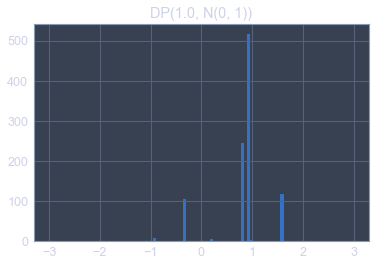

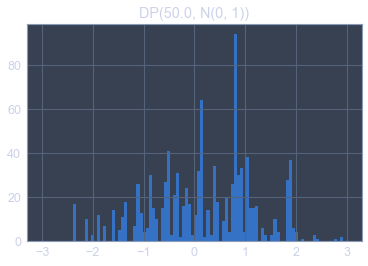

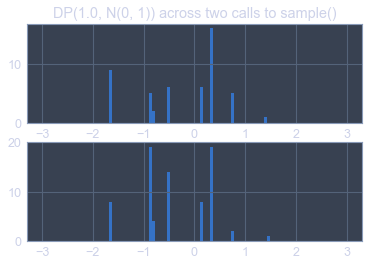

[0.96817374, 0.96817374]
[0.59448326, 0.59448326]
RandomVariable("DirichletProcess_4/", shape=(3, 5, 2), dtype=int32)


In [5]:
  # Demo of the DirichletProcess random variable in Edward.
  base = Normal(0.0, 1.0)

  # Highly concentrated DP.
  alpha = 1.0
  dp = DirichletProcess(alpha, base)
  x = dp.sample(1000)
  samples = sess.run(x)
  plt.hist(samples, bins=100, range=(-3.0, 3.0))
  plt.title("DP({0}, N(0, 1))".format(alpha))
  plt.show()

  # More spread out DP.
  alpha = 50.0
  dp = DirichletProcess(alpha, base)
  x = dp.sample(1000)
  samples = sess.run(x)
  plt.hist(samples, bins=100, range=(-3.0, 3.0))
  plt.title("DP({0}, N(0, 1))".format(alpha))
  plt.show()

  # States persist across calls to sample() in a DP.
  alpha = 1.0
  dp = DirichletProcess(alpha, base)
  x = dp.sample(50)
  y = dp.sample(75)
  samples_x, samples_y = sess.run([x, y])
  plt.subplot(211)
  plt.hist(samples_x, bins=100, range=(-3.0, 3.0))
  plt.title("DP({0}, N(0, 1)) across two calls to sample()".format(alpha))
  plt.subplot(212)
  plt.hist(samples_y, bins=100, range=(-3.0, 3.0))
  plt.show()

  # `theta` is the distribution indirectly returned by the DP.
  # Fetching theta is the same as fetching the Dirichlet process.
  dp = DirichletProcess(alpha, base)
  theta = Normal(0.0, 1.0, value=tf.cast(dp, tf.float32))
  print(sess.run([dp, theta]))
  print(sess.run([dp, theta]))

  # DirichletProcess can also take in non-scalar concentrations and bases.
  alpha = tf.constant([0.1, 0.6, 0.4])
  base = Exponential(rate=tf.ones([5, 2]))
  dp = DirichletProcess(alpha, base)
  print(dp)